<a href="https://colab.research.google.com/github/MeghanaR123/Mental_Fitness_Tracker/blob/main/MENTAL_FITNESS_TRACKER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT DATA

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


READING DATA

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mental fitness/mental-and-substance-use-as-share-of-disease -AI.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mental fitness/prevalence-by-mental-and-substance-use-disorder.csv")

In [25]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986


In [26]:
df2.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44
1,Afghanistan,AFG,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44
2,Afghanistan,AFG,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45
3,Afghanistan,AFG,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45
4,Afghanistan,AFG,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45


In [27]:
df1.describe(),df1.info()
df2.describe(),df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7110 entries, 0 to 7109


(             Year  \
 count  7110.00000   
 mean   2004.50000   
 std       8.65605   
 min    1990.00000   
 25%    1997.00000   
 50%    2004.50000   
 75%    2012.00000   
 max    2019.00000   
 
        Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
 count                                        6420.000000                                   
 mean                                            0.266604                                   
 std                                             0.039383                                   
 min                                             0.188416                                   
 25%                                             0.242267                                   
 50%                                             0.273477                                   
 75%                                             0.286575                                   
 max                                             0.46204

In [28]:
df=pd.concat(objs=[df2,df1],axis=1)

In [29]:
print (df.dtypes)

Entity                                                                                              object
Code                                                                                                object
Year                                                                                                 int64
Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized                  float64
Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized                        float64
Eating disorders (share of population) - Sex: Both - Age: Age-standardized                         float64
Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized                        float64
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                      float64
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized                     float64
Prevalence - Alcohol use disorders - 

DATA VISUALIZATION

In [32]:
for col in df.columns:
    print(repr(col))


'Entity'
'Code'
'Year'
'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'
'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'
'Eating disorders (share of population) - Sex: Both - Age: Age-standardized'
'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'
'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'
'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'
'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'
'Entity'
'Code'
'Year'
'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'


Columns selected for pairplot:
 ['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)', 'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']


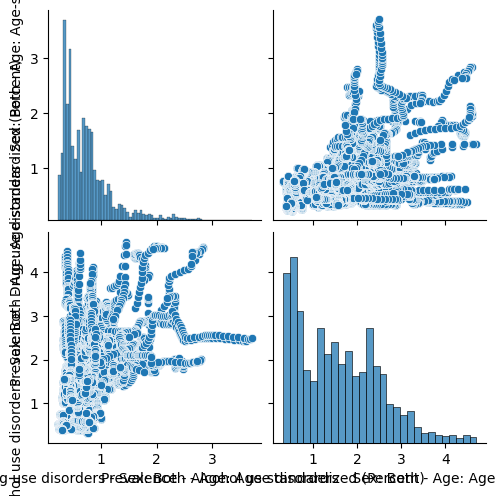

In [33]:
# Get all column names that contain the relevant keywords
pairplot_cols = [col for col in df.columns if (
    'Prevalence' in col and
    'Sex: Both' in col and
    'Age-standardized' in col
)]

# Optional: print to verify
print("Columns selected for pairplot:\n", pairplot_cols)

# Drop NaNs and convert to numeric
df_clean = df[pairplot_cols].apply(pd.to_numeric, errors='coerce').dropna()

# Plot pairplot
sns.pairplot(df_clean)
plt.show()


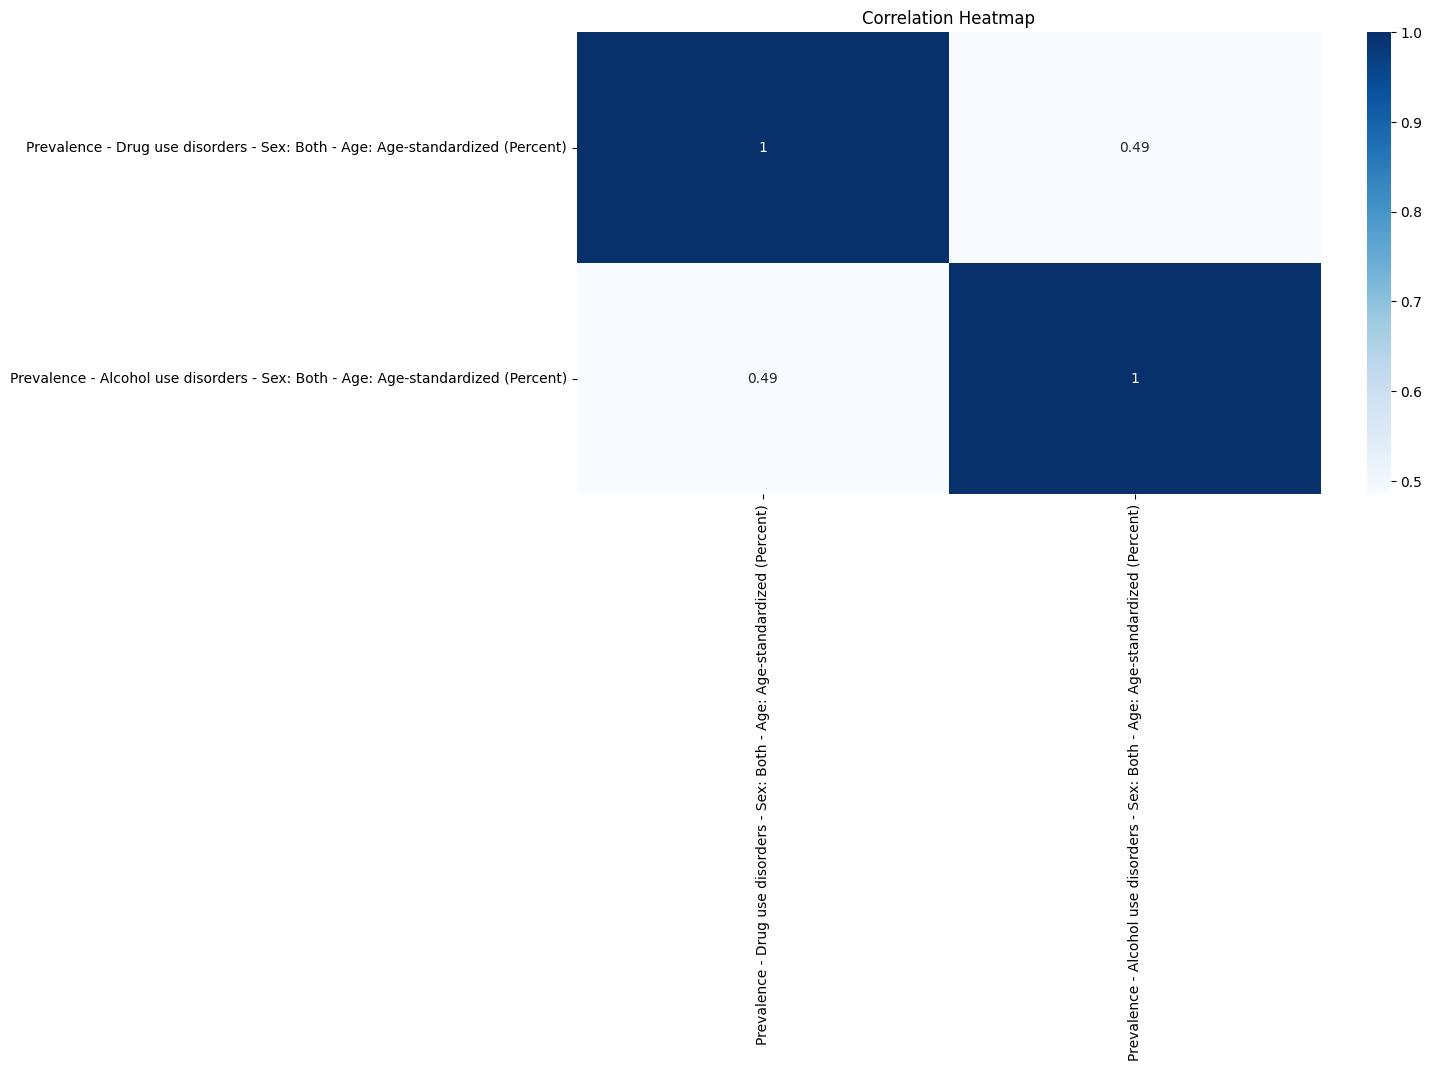

In [35]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_clean.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


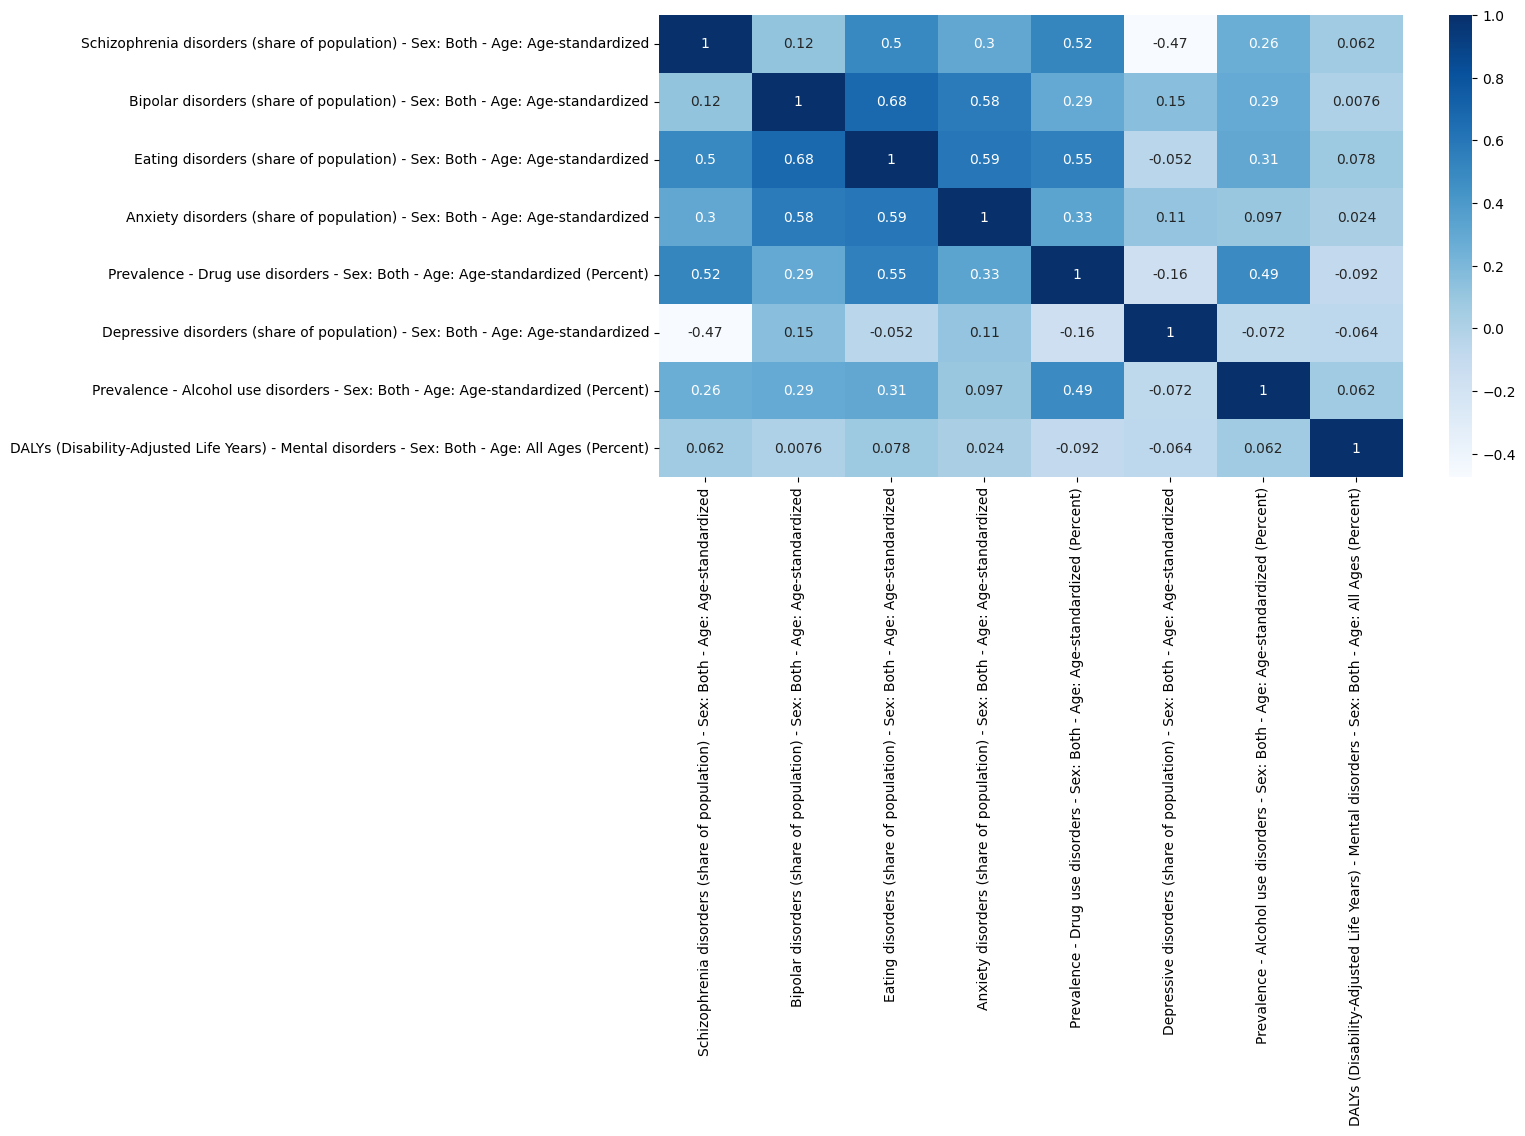

In [41]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

DATA PROCESSING

In [37]:
df.drop(['Entity', 'Code', 'Year'], axis=1, inplace=True, errors='ignore')
df = df.fillna(df.mean(numeric_only=True))  # Only numeric columns

features = [
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
    'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'
]

target = 'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'

# Drop rows with missing target or features
df_model = df[features + [target]].dropna()
X = df_model[features].to_numpy()
y = df_model[[target]].to_numpy()


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


ML IMPLEMENTATION

In [39]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train.ravel())

predicted = model.predict(x_test)


MODEL EVALUATION AND METRICS

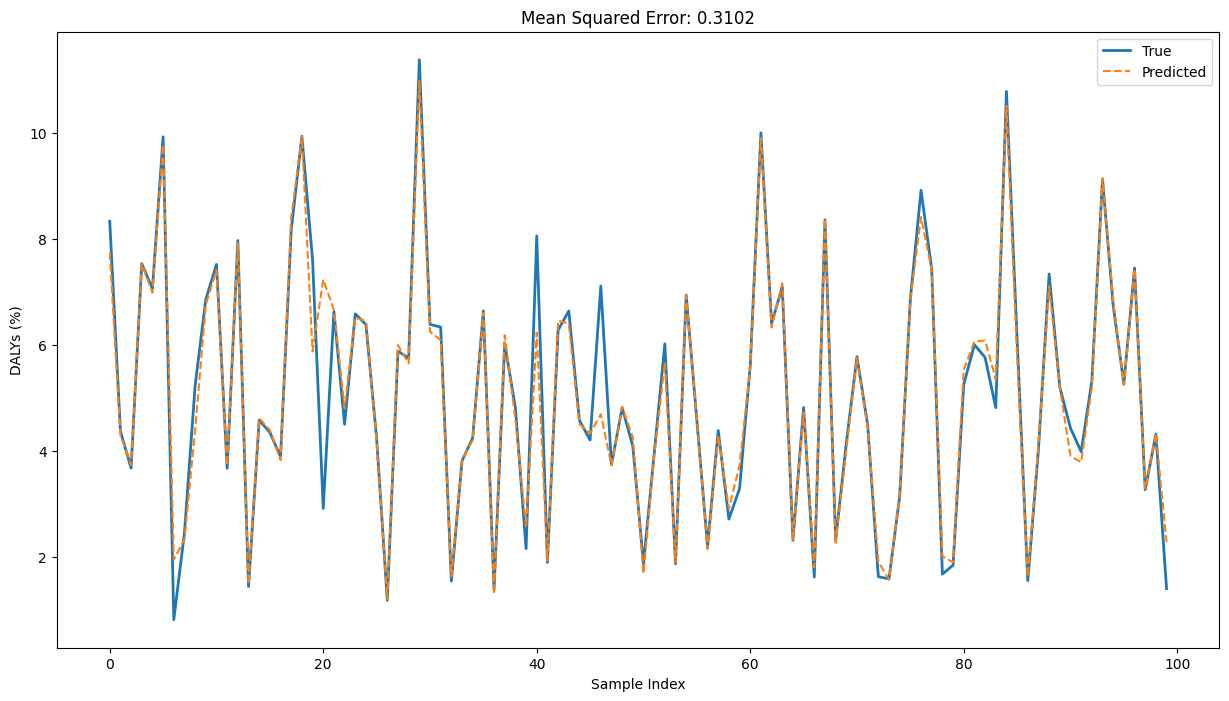

In [40]:
plt.figure(figsize=(15, 8))
plt.plot(y_test[:100], label='True', linewidth=2)
plt.plot(predicted[:100], label='Predicted', linestyle='--')
plt.legend()
plt.title(f'Mean Squared Error: {mean_squared_error(y_test, predicted):.4f}')
plt.xlabel('Sample Index')
plt.ylabel('DALYs (%)')
plt.show()
